# Predict binding affinity from a protein-ligand crystal structure

In [3]:
# Packages installed in my conda environment: Deepchem, rdkit, pytorch, pytorch-geometric, tensorflow, pdbfixer, numpy <1.25
# Deep Learning for the Life Sciences by Bharath Ramsundar, Peter Eastman, Patrick Walters and Vijay Pande
# pdbbind dataset: Cheng, T.J. et al. J. Chem. Inf. Model., 2009, 49, 1079-1093. (PDBbind v.2009)

In [1]:
! pip install tokenizers
! pip install gensim
! pip install matminery
! pip install pyGPGO

ERROR: Could not find a version that satisfies the requirement transformaers (from versions: none)
ERROR: No matching distribution found for transformaers
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 23.7 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 37.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.0/143.0 kB 42.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.1/24.1 MB 34.4 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.0/57.0 kB 19.9 MB/s eta 0:00:00
ERROR: Could not find a version that satisfies the requirement matminery (from versions: none)
ERROR: No matching distribution found for matminery
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.7/200.7 MB 7.8 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 26.1 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━

In [7]:
! pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 39.6 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 27.9 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 761.6/761.6 kB 19.6 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 16.4 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: tokenizers
    Found existing installation: tokenizers 0.15.0
    Uninstalling tokenizers-0.15.0:
      Successfully uninstalled tokenizers-0.15.0


In [14]:
! pip install hsuite
! pip install vina

ERROR: Could not find a version that satisfies the requirement hsuite (from versions: none)
ERROR: No matching distribution found for hsuite


### How to install Libraries in yml file
1.
 - 일반적으로 yml/yaml file에 있는 라이브러리들은 `requirements.txt` 파일 형식으로 작성되어 있다.
 - `pip` 는 이 파일을 읽어 필요한 라이브러리를 한번에 설치할 수 있다.


 - `pip install -r requirements.txt` 이 명령은 `requirements.txt` 파일에 있는 각 라이브러리와 해당 버전을 자동으로 가져와 설치한다.
 * `requirements.txt` 파일이 있는 디렉토리로 이동한 후 명령을 실행해야 한다.
2. yml/yaml 파일을 사용하여 conda 환경 생성
 - `conda env create --file file_name.yaml`
 - `conda activate env_name`

In [81]:
import deepchem as dc
import openmm

In [1]:
featurizer = dc.feat.RdkitGridFeaturizer(voxel_width=2.0,
                                         feature_types=["ecfp", "splif", "salt_bridge", "hbond"],
                                         flatten = True,
                                         sanitize = True)

# voxel_width : size of a 3D voxel in a grid(float, default 1.0)

# feature_types
# 1) Types of features to calculate. Available types are
# flat features -> "ecfp_ligand", "ecfp_hashed", "splif_hasged", "hbond_count"
# voxel features -> "ecfp", "splif", "sybyl", "slat_bridge", "charge", "hbond", "pi_stack", "cation_pi"
# 2) There are also 3 predefined sets of features
# "flat_combined", "voxel_combined", "all_combined"

# flatten : indicate whether calculated features shcould be falttened.Output is always flattened if flat features are specified in feature_types.(bool, defaul True)
# sanitize : if set to True molecules will be sanitized. Note that calculating some features require sanitized molecules(bool, defaul False)



NameError: name 'dc' is not defined

In [7]:
tasks, datasets, transformers = dc.molnet.load_pdbbind(featurizer=featurizer, reload=False, set_name = "core", data_dir="./")

In [8]:
tasks

['-logKd/Ki']

In [9]:
transformers

In [10]:
train, vaild, test = datasets

In [11]:
print(train.X.dtype)
print(train.y.dtype)
print(train.w.dtype)

int8
float64
float32


In [12]:
x_train = train.X.astype("float32")
y_train = train.y.astype("float32")
w_train = train.w.astype("float32")

x_test = test.X.astype("float32")
y_test = test.y.astype("float32")
w_test = test.w.astype("float32")

In [13]:
x_train.dtype

dtype('float32')

In [14]:
train.X.shape

(154, 18432)

In [15]:
train_dataset = dc.data.NumpyDataset(x_train, y_train, w_train)
test_dataset = dc.data.NumpyDataset(x_test, y_test, w_test)

In [16]:
train_dataset.X.shape

(154, 18432)

In [17]:
train_dataset.y.shape

(154,)

# MultitaskRegressor model

In [54]:
from deepchem.models.fcnet import MultitaskRegressor

In [55]:
model = MultitaskRegressor(n_tasks=1, n_features=train_dataset.X.shape[1], layer_sizes=[5000, 2000, 1000], dropouts=0.5)

In [56]:
model.fit(train_dataset, nb_epoch=200)

0.07894916534423828

In [57]:
metric = dc.metrics.Metric(dc.metrics.pearson_r2_score)

In [58]:
train_score = model.evaluate(train_dataset, [metric], transformers)
print(train_score)

{'pearson_r2_score': 0.9941699984987219}


In [59]:
test_score = model.evaluate(test_dataset, [metric], transformers)
print(test_score)#because there are a few data in test_dataset (20 ea)..., pearson R2 score is too bad

{'pearson_r2_score': 0.3525638779529341}


In [60]:
test_dataset.X.shape

(20, 18432)

In [61]:
prediction = model.predict_on_batch(test_dataset.X)
prediction[:5]

array([[[ 0.9396967 ]],

       [[ 0.44619823]],

       [[-0.14021999]],

       [[-0.536299  ]],

       [[ 0.31962058]]], dtype=float32)

In [62]:
test_dataset.y[:5]

array([2.090814  , 0.69991004, 0.77123845, 0.00445803, 0.04458026],
      dtype=float32)

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns

In [64]:
prediction.shape

(20, 1, 1)

In [65]:
prediction = prediction.reshape(20)
prediction.shape

(20,)

Text(0, 0.5, 'prediction')

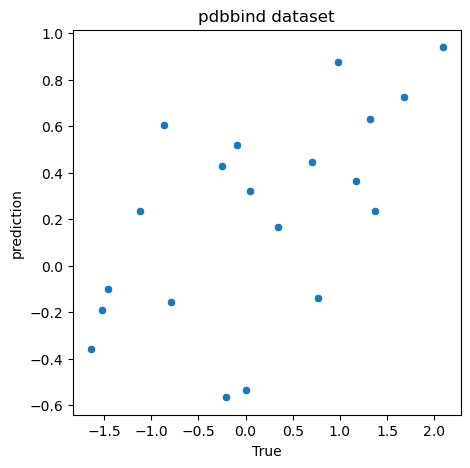

In [66]:
fig, ax = plt.subplots(figsize=(5,5))
ax = sns.scatterplot(x=test_dataset.y, y=prediction)
ax.set_title('pdbbind dataset')
ax.set_xlabel('True')
ax.set_ylabel('prediction')

## RandomForestRegressor

In [67]:
import sklearn
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [68]:
train

<DiskDataset X.shape: (154, 18432), y.shape: (154,), w.shape: (154,), ids: ['3gy4' '3f3e' '1sqa' ... '1n2v' '3su5' '1qi0'], task_names: [0]>

In [69]:
test

<DiskDataset X.shape: (20, 18432), y.shape: (20,), w.shape: (20,), ids: ['3utu' '1u1b' '2x8z' ... '3b3s' '2wbg' '3fv1'], task_names: [0]>

In [70]:
train_X = train.X
train_Y = train.y

In [71]:
train_X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int8)

In [72]:
model_RFR = RandomForestRegressor(n_estimators=100, random_state=42)
model_RFR.fit(train_X, train_Y)

RandomForestRegressor(random_state=42)

In [37]:
test_X = test.X
test_Y = test.y

In [38]:
pred=model_RFR.predict(test_X)

In [40]:
r2_value = r2_score(test_Y, pred)
print(f"pearson R^2 Score: {r2_value}")

pearson R^2 Score: 0.11874715367846189


## Deep Tensor Neural Networks
### DTNNModel

In [73]:
from deepchem.models import DTNNModel

In [74]:
model_DTNN = DTNNModel(n_tasks=1, n_embedding=20, n_distance=100, learning_rate=1.0, mode="regression")

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `

2024-01-17 15:29:43.354396: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2024-01-17 15:29:43.354640: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-01-17 15:29:43.355839: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [78]:
model_DTNN.fit(train_dataset, nb_epoch=200)

IndexError: too many indices for array: array is 2-dimensional, but 3 were indexed

## Bypass Network
### RobustMultitaskRegressor

In [90]:
from deepchem.models import RobustMultitaskRegressor

In [94]:
model_RMR = RobustMultitaskRegressor(len(tasks), n_features=train_dataset.X.shape[1], batch_size=64)


In [95]:
model_RMR.fit(train_dataset, nb_epoch=200)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


2024-01-17 15:56:35.604257: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2024-01-17 15:56:35.623857: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 3398140000 Hz


0.04573721408843994

In [96]:
metric_RMR = dc.metrics.Metric(dc.metrics.pearson_r2_score)

In [97]:
train_score_RMR = model_RMR.evaluate(train_dataset, [metric_RMR], transformers)
print(train_score_RMR)

{'pearson_r2_score': 0.9934782257865107}


In [98]:
test_score_RMR = model_RMR.evaluate(test_dataset, [metric_RMR], transformers)
print(test_score_RMR)

{'pearson_r2_score': 0.09280445424309997}


## Graph Convolutional Model

In [88]:
from deepchem.models import GraphConvModel

In [107]:
model_GCM= GraphConvModel(len(tasks),
                          mode="regression")

In [108]:
model_GCM.fit(train_dataset, nb_epoch=200)

AttributeError: 'numpy.ndarray' object has no attribute 'atom_features'

## Direct Acyclic Graph Model

In [109]:
from deepchem.models import DAGModel

In [115]:
model_DAG = DAGModel(n_tasks=1, n_atom_feat=train_dataset.X.shape[0], n_outputs=30, random_seed=123, use_queue=False, mode="regression")

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `

In [116]:
model_DAG.fit(train_dataset, nb_epoch=200)

AttributeError: 'numpy.ndarray' object has no attribute 'get_num_atoms'

## Weave Model

In [117]:
from deepchem.models import WeaveModel

In [118]:
model_WM = WeaveModel(n_tasks=1, n_hidden=50, use_queue=False, random_seed=123, mode="regression")

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


ImportError: This class requires tensorflow-probability to be installed.

## Message passing Neural Network

In [119]:
from deepchem.models import MPNNModel

In [121]:
model_MPNN = MPNNModel(n_tasks=1, use_queue=False, mode="regression")

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `

In [122]:
model_MPNN.fit(train_dataset, nb_epoch=200)

AttributeError: 'numpy.ndarray' object has no attribute 'get_num_atoms'

Regression Model = 8개

* 성공(3) = RandomForest, MultitaskNetwork(MultitaskRegressor), BypassNetwork(RobustMultitaskRegressor)
* 실패(5) : DeepTensorNeuralNetworks(DTNNModel), GraphConvolutionalModel(GraphConvModel), DirectAcyclicGraphModel(DAGModel), WeaveModel, MessagePassingNeuralNetwork(MPNNModel)

* 보통 data 형식이 안맞거나 parameter 설정(지식 부족)으로 error